In [0]:
df_transaction=spark.read.parquet("dbfs:/FileStore/co2/Silver/tables/deltas/transactions/")
df_bank_account=spark.read.parquet("dbfs:/FileStore/co2/Silver/tables/deltas/bank_account")
df_category=spark.read.parquet("dbfs:/FileStore/co2/Silver/tables/category_table.parquet")
df_ctpt=spark.read.parquet("dbfs:/FileStore/co2/Silver/tables/deltas/ctpt")
df_currency=spark.read.parquet("dbfs:/FileStore/co2/Silver/tables/currency_table.parquet")

In [0]:
df_transaction.count()

148833

In [0]:
# Join according to primary keys
df_join=df_transaction.join(df_bank_account,'acct_id').join(df_category,'dtld_tx_tp').join(df_currency,'acct_ccy').join(df_ctpt,'ctpty_nm')
df_join.count()

# df_join.select('dtld_tx_tp','bookg_amt','Emmissionmultiplier','euro_multiplier').show()

148833

In [0]:
# Co2 emission tonne, for every transaction
from pyspark.sql.functions import col, cast
df_measure = df_join.withColumn('co2emis_tonne', df_join.bookg_amt * df_join.Emmissionmultiplier*df_join.euro_multiplier*0.000001 )
df_measure = df_measure.withColumn("co2emis_tonne", col("co2emis_tonne").cast("double"))

In [0]:
#  Co2 emission tonne, by categories
display(df_measure)

ctpty_nm acct_ccy dtld_tx_tp acct_id booking_id bookg_amt year_month bal_aftr_bookg Transaction_Type_Discription Emmissionmultiplier euro_multiplier ctpty_acct_id_iban ctpty_adr_line1 ctpty_acct_ccy ctpty_ctry co2emis_tonne Geldmaat ATM CAD 2222 CA81VANC2187753891 99c5696a-cf7e-4145-be18-8350a1aa5924 2690.0 201302 4428.0 ATM 74.03 1.3 null 鹿児島県豊島区羽折町7丁目24番12号 null Japan 0.25888291 Geldmaat ATM GBP 2222 GB45SCAM5960717934 fb70b737-e71d-466e-9571-6b0b1a13da31 320.0 201302 4069.0 ATM 74.03 0.8 null 鹿児島県豊島区羽折町7丁目24番12号 null Japan 0.01895168 Geldmaat ATM CAD 2222 CA81VANC7391184479 4add7f53-78b8-4322-a6b7-46b03de63fc9 174.0 201302 7433.0 ATM 74.03 1.3 null 鹿児島県豊島区羽折町7丁目24番12号 null Japan 0.016745586 Stichting van het Heerenveen EUR 5462 NL12FAKE8932716792 1d2093eb-a566-4203-998a-bea504ef15f5 84.02 201302 771.68 Bakeries 84.4 1.0 NL12FAKE5041131649 Emmaboulevard 0,8942KY,Horn EUR NL 0.007091288 MSD EUR 7512 NL12FAKE6273159903 3ad6a065-3f92-4097-b1d9-28738b76cde0 5.02 201302 1947.66 Automobile rental agency, not elsewhere classified 235.11 1.0 NL12FAKE7844202338 Esthersteeg 7,7996 QO,Gieterveen EUR NL 0.0011802521999999998 van den Broek & van Leeuwen CAD 6630 CA81VANC9214853049 76b7d88a-baa9-4664-96d3-0fcaf301cacc 79.07 201302 3920.44 Water 1045.62 1.3 NL05YEPP9052403922 Maritsteeg 168,5719 JT,Klundert EUR NL 0.10748032541999998 Allen-Klein EUR 5542 NL05YEPP4430854745 071cfa4f-e4a5-47ab-8ba8-79d16a158e36 5.88 201302 3035.56 Fuel dispenser automated 235.11 1.0 US19PONZ3964354121 75866 Mitchell Locks,South Paulaberg, PR 31248 USD United States 0.0013824468000000001 Geldmaat ATM EUR 2222 NL98BOER5453744119 3ca43f7b-4d54-44fb-b39e-1cdab598c585 2035.0 201302 5209.59 ATM 74.03 1.0 null 鹿児島県豊島区羽折町7丁目24番12号 null Japan 0.15065104999999998 Geldmaat ATM EUR 2222 NL12FAKE7946964322 d7f30998-29dd-47ff-a7d3-94eb04a180cd 2295.0 201302 4973.51 ATM 74.03 1.0 null 鹿児島県豊島区羽折町7丁目24番12号 null Japan 0.16989885 Welf & Kosten EUR 6542 NL12FAKE7870892612 5af5f275-3b09-4224-9c64-1ddb1e0d5673 278.81 201302 1134.07 Gas & Electricity 592.94 1.0 NL05YEPP8232565032 Kickbaan 6,2702NG,Wagenberg EUR NL 0.1653176014 Peters, Lutz and Martinez EUR 4111 NL12FAKE9226544131 e5653413-91e8-4e78-8ba0-9042cba2b7de 4.82 201302 7245.61 Transportation, suburban and local commuter passenger 226.24 1.0 CA81VANC4291325835 97382 Albert Station Apt. 686,New Becky, ON B8L 5X9 CAD Canada 0.0010904768 Stichting van Dooren EUR 4111 NL05YEPP4771399505 21d3cb5e-0b1f-46c0-a61c-b6d871e40b51 4.1 201302 7353.74 Transportation, suburban and local commuter passenger 226.24 1.0 NL12FAKE7336814535 Loeshof 4,7986AE,Bad Nieuweschans EUR NL 9.275839999999999E-4 Pirandello-Briccialdi e figli GBP 6630 GB45SCAM5655660421 ac9f045b-2133-43d1-9361-152ea3b0b823 42.83 201302 6298.22 Water 1045.62 0.8 NL05YEPP1132733682 Strada Aria, 37,38015, Nave San Felice (TN) EUR Italy 0.035827123679999996 Den Braven Group EUR 5420 NL05YEPP3421167058 7d41f5b7-d7a6-4555-b58f-90c96079ac6b 33.02 201302 2953.79 Food & Drinks 610.44 1.0 NL12FAKE8568421276 Karlijnpad 84,5623 YV,Graft EUR NL 0.020156728800000002 Geldmaat ATM EUR 2222 NL12FAKE4448925455 f3e6cb72-2d81-4918-9c87-17d90566b366 63.53 201302 1318.73 ATM 74.03 1.0 null 鹿児島県豊島区羽折町7丁目24番12号 null Japan 0.0047031259 Lambers & Scholten EUR 5422 NL05YEPP4478046993 58c470e8-f8de-483f-a8cf-50dbf4dd9557 18.79 201302 1813.86 Freezer, Locke_meat provisioners 10.44 1.0 NL12FAKE8300242821 Jasonpad 9,2170UH,Zaandam EUR NL 1.9616759999999998E-4 Kiss Németh Kft. EUR 4112 NL05YEPP4215321153 8fb8c026-3536-4b23-9233-20d18392d632 32.98 201302 5059.57 Passenger railways (long range) 255.74 1.0 NL12FAKE4520313648 Petőfi utca 127.,H-8849 székfalva EUR Hungary 0.008434305199999999 Collins Ltd EUR 5422 NL05YEPP9874717979 8a7bc163-ff7d-48d1-88b6-e7fe29991b48 9.94 201302 100.17 Freezer, Locke_meat provisioners 10.44 1.0 GB45SCAM6889293211 Studio 14,Stephen stravenue,East Catherinebury,G98 1PF GBP Great Britain 1.0377359999999999E-4 Janssen de Jong Groep EUR 4111 NL05YEPP4422139717 41b1ae23-6e92-4024

Databricks data profile. Run in Databricks to view.

Databricks visualization. Run in Databricks to view.

In [0]:
from pyspark.sql.functions import sum, format_number
df_mea_by_category=df_measure.groupby('Transaction_Type_Discription').agg(format_number(sum(df_measure["co2emis_tonne"]),2).alias('co2e_tonne'))

In [0]:
# Clean commas to convert double
from pyspark.sql.functions import regexp_replace
df_mea_by_category = df_mea_by_category.withColumn('co2e_tonne', regexp_replace('co2e_tonne',',',''))
df_mea_by_category = df_mea_by_category.withColumn("co2e_tonne", col("co2e_tonne").cast("double"))

In [0]:
display(df_mea_by_category)

Transaction_Type_Discription co2e_tonne Water 597.29 Gas & Electricity 1838.57 Passenger railways (long range) 255.09 Bakeries 39.73 ATM 2825.45 Aircarriers, airlines, not elsewhere classified 8152.29 Groceries 468.14 Package stores, beer, wine, and liquor 88.27 Fuel dispenser automated 186.42 Freezer, Locke_meat provisioners 2.37 Limousines, taxi, cabs 145.67 Automobile rental agency, not elsewhere classified 110.66 Service stations (with or without extra services) 920.53 Buslines 43.08 Tikkie 65.89 Transportation, suburban and local commuter passenger 33.07 Food & Drinks 331.64

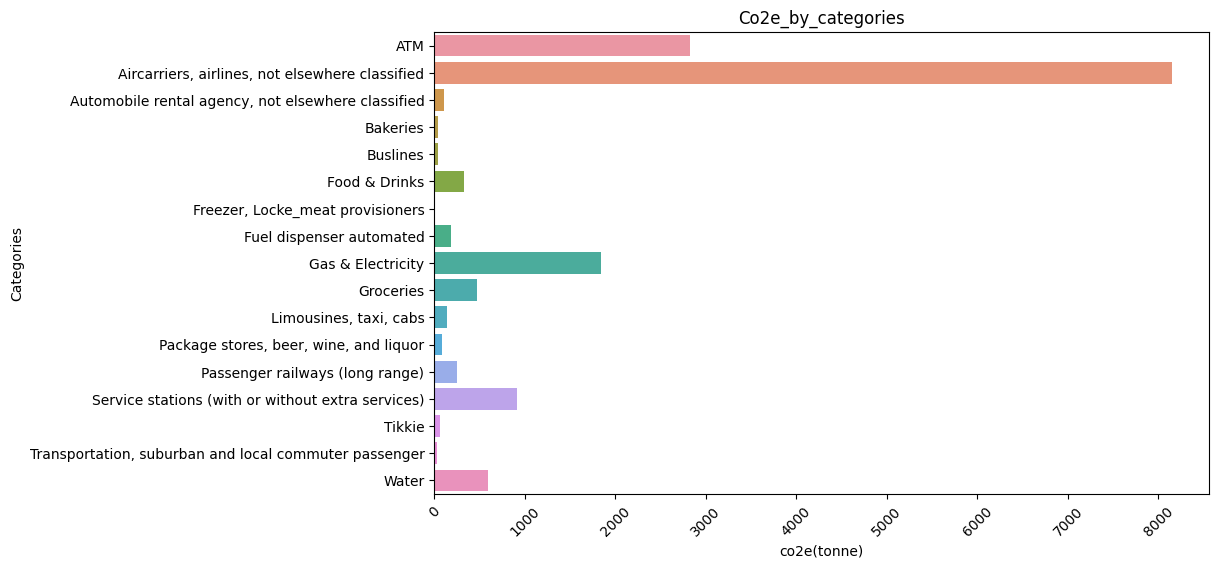

In [0]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# from pyspark.sql import SparkSession

# # Assuming you already have a SparkSession named 'spark'
# # If not, create one like this:
# # spark = SparkSession.builder \
# #     .appName("example") \
# #     .getOrCreate()

# # Assuming 'spark_df' is your Spark DataFrame
# # Convert Spark DataFrame to pandas DataFrame
pandas_df = df_mea_by_category.toPandas()

pandas_df['Transaction_Type_Discription'] = pandas_df['Transaction_Type_Discription'].astype('category')
pandas_df['co2e_tonne'] = pandas_df['co2e_tonne'].astype('float')
pandas_df=pandas_df.sort_values(by='co2e_tonne')
# # Set figure size
plt.figure(figsize=(10, 6))  # Adjust the size as needed

# # Plotting with Seaborn
sns.barplot(x='co2e_tonne', y='Transaction_Type_Discription', data=pandas_df)

# # Add labels and title
plt.xlabel('co2e(tonne)')
plt.ylabel('Categories')
plt.title('Co2e_by_categories')

# # Rotate x-axis labels if needed
plt.xticks(rotation=45)

# # Show the plot
plt.show()

In [0]:
# Most important columns
df_measure_gold=df_measure.select('year_month','acct_id','bal_aftr_bookg','co2emis_tonne','Transaction_Type_Discription','ctpty_ctry')
df_measure_gold.show()

+----------+------------------+--------------+--------------------+----------------------------+-------------+
|year_month|           acct_id|bal_aftr_bookg|       co2emis_tonne|Transaction_Type_Discription|   ctpty_ctry|
+----------+------------------+--------------+--------------------+----------------------------+-------------+
|    201302|CA81VANC2187753891|        4428.0|          0.25888291|                         ATM|        Japan|
|    201302|GB45SCAM5960717934|        4069.0|          0.01895168|                         ATM|        Japan|
|    201302|CA81VANC7391184479|        7433.0|         0.016745586|                         ATM|        Japan|
|    201302|NL12FAKE8932716792|        771.68|         0.007091288|                    Bakeries|           NL|
|    201302|NL12FAKE6273159903|       1947.66|0.001180252199999...|        Automobile rental...|           NL|
|    201302|CA81VANC9214853049|       3920.44| 0.10748032541999998|                       Water|           NL|
|

In [0]:
# Overwrite gold parquet 
df_measure_gold.write.mode('overwrite').parquet('dbfs:/FileStore/co2/Gold/df_gold')

In [0]:
# df_measure_gold.write.format("delta").mode("overwrite").option("mergeSchema", "true").saveAsTable('Co2e_Table')
df_measure_gold.write.format("delta").mode("overwrite").saveAsTable('Co2e_Table')

In [0]:
df_measure_gold.show()

+----------+------------------+--------------+--------------------+----------------------------+-------------+
|year_month|           acct_id|bal_aftr_bookg|       co2emis_tonne|Transaction_Type_Discription|   ctpty_ctry|
+----------+------------------+--------------+--------------------+----------------------------+-------------+
|    201302|CA81VANC2187753891|        4428.0|          0.25888291|                         ATM|        Japan|
|    201302|GB45SCAM5960717934|        4069.0|          0.01895168|                         ATM|        Japan|
|    201302|CA81VANC7391184479|        7433.0|         0.016745586|                         ATM|        Japan|
|    201302|NL12FAKE8932716792|        771.68|         0.007091288|                    Bakeries|           NL|
|    201302|NL12FAKE6273159903|       1947.66|0.001180252199999...|        Automobile rental...|           NL|
|    201302|CA81VANC9214853049|       3920.44| 0.10748032541999998|                       Water|           NL|
|

In [0]:
# Total Emission
from pyspark.sql.functions import sum, format_number

df_measure_gold.select(format_number(sum(df_measure_gold["co2emis_tonne"]), 2).alias('total_co2_emission(tonne)')).show()


+-------------------------+
|total_co2_emission(tonne)|
+-------------------------+
|                16,104.14|
+-------------------------+



In [0]:
df_mea_by_month=df_measure.groupby('year_month').agg(format_number(sum(df_measure["co2emis_tonne"]),2).alias('co2e_tonne'))
# df_mea_by_month = df_mea_by_month.withColumn("co2emis_tonne", col("co2emis_tonne").cast("double"))
df_mea_by_month.show()


+----------+----------+
|year_month|co2e_tonne|
+----------+----------+
|    201302| 15,636.20|
|    201303|    467.94|
+----------+----------+



In [0]:
# Clean commas to convert double
from pyspark.sql.functions import regexp_replace
df_mea_by_month = df_mea_by_month.withColumn('co2e_tonne', regexp_replace('co2e_tonne',',',''))
df_mea_by_month = df_mea_by_month.withColumn("co2e_tonne", col("co2e_tonne").cast("double"))


In [0]:
display(df_mea_by_month)

year_month co2e_tonne 201302 15636.2 201303 467.94

Databricks visualization. Run in Databricks to view.